**<u>Plotting Normal Distributions In R Using ggplot2**</u>

&nbsp;

Hi. I have been experimenting with creating (standard) normal distributions (Gaussians) using R and ggplot2. Here is what I have come up with. It is assumed that the reader is familiar with the normal distribution, Z-scores, and standard deviations.

&nbsp;

**<u>Table Of Contents</u>**

&nbsp;

**Part One**

* Simple Normal Distribution Plots</a>

* Plotting Two Normal Distributions In The Same Plot</a>

&nbsp;

**Part Two - Plotting Standard Normal Distributions With Areas**

&nbsp;

* Filling The Area Within One Standard Deviation Of The Mean</a>

* Filling The Area Within Two Standard Deviations Of The Mean</a>

* Filling The Area Within Three Standard Deviations Of The Mean</a>

&nbsp;

**Part Three - Creating Normal Distribution Summary Plots**

&nbsp;

This section has three versions of the normal distribution with percentage labels with the area under the normal curve. The code and outputs are provided.

**Notes**

**References**


**<u>Part One</u>**

&nbsp;

**<u>Simple Normal Distribution Plots</u>**

&nbsp;

In the ggplot2 package in R, plotting the normal distribution is not very difficult. In the code below, I specify a domain for the x-values. After the `ggplot()`, it is important to have the `stat_function()` part with `fun = dnorm`. The dnorm function refers to the (standard) normal distribution density function with mean = 0 and standard deviation of 1. (Do load the ggplot2 package in R by typing in `library(ggplot2)`.)

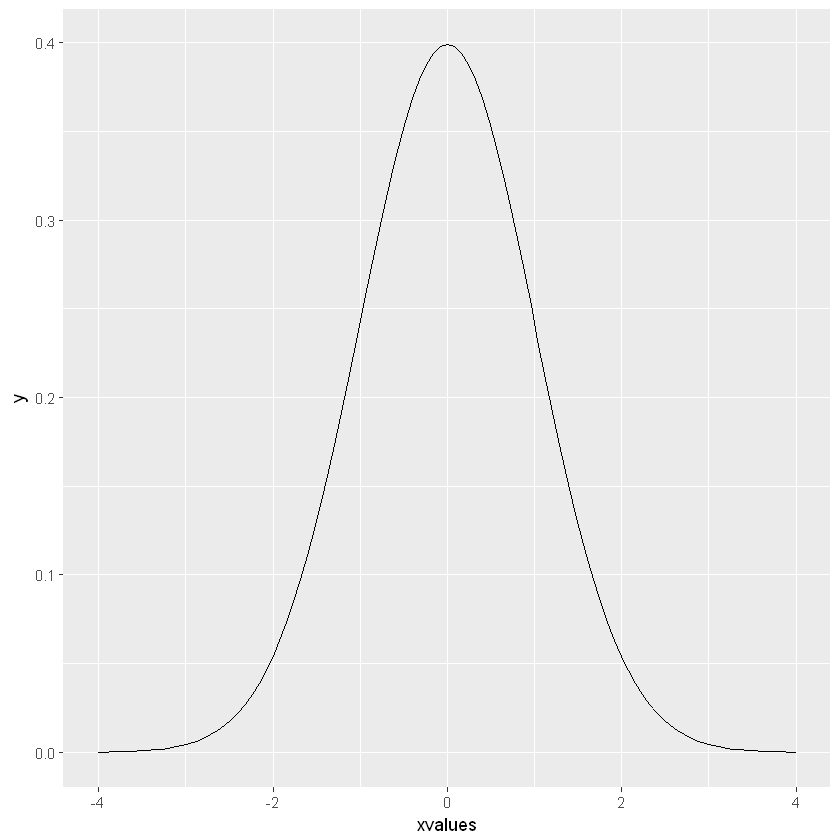

In [3]:
library(ggplot2)

## Standard normal distribution:

xvalues <- data.frame(x = c(-3, 3))

plot <- ggplot(xvalues, aes(x = xvalues))

plot + stat_function(fun = dnorm) + xlim(c(-4, 4))

**<u>Plotting Two Normal Distributions In The Same Plot</u>**

&nbsp;

Multiple probability distributions and functions can be plotted together. In this example, I plot a standard normal distribution and a normal distribution with a mean of 2 and a standard deviation of 3. The standard normal distribution is represented from dnorm and the other normal distribution is represented by a custom function in each of the `stat_function()` parts.

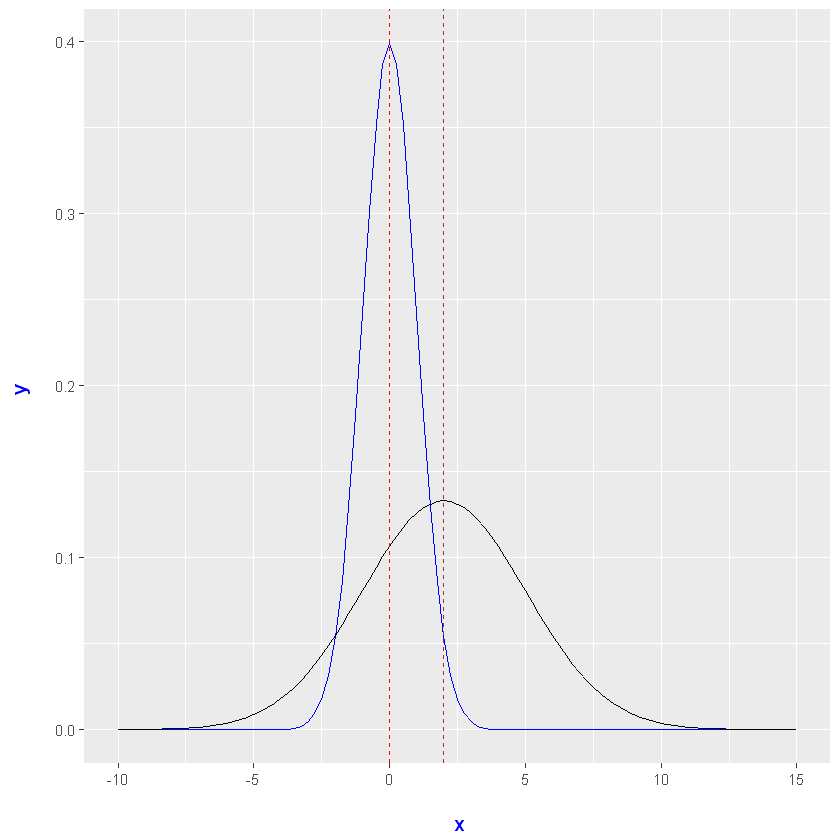

In [4]:
## A different normal distribution

normal2 <- function(x){
  dnorm(x, mean = 2, sd = 3)
}

## Put both normal distributions together:

plot + stat_function(fun = dnorm, colour = "blue") + 
  stat_function(fun = normal2) + xlim(c(-10, 15)) + 
  labs(x = "\n x", y = "y \n") +
  theme(axis.title.x = element_text(face="bold", colour="blue", size = 12),
        axis.title.y = element_text(face="bold", colour="blue", size = 12)) +
  geom_vline(xintercept = 0, linetype = "dashed", colour = "red") +
  geom_vline(xintercept = 2, linetype = "dashed", colour = "brown")

Note that the vertical dashed lines represent the means of their respective normal distributions. The red dashed line is for the normal distribution centered at the mean of 0 and the brown dashed line is for the normal distribution centered at the mean of 3.

**<u>Part Two - Plotting Standard Normal Distributions With Areas</u>**

&nbsp;

In part two, areas under the standard normal distribution curve will be filled in. I fill in areas under the normal curve from within one standard deviation of the mean to three standard deviations of the mean.

As a side note, recall that a key formula for standardizing a normal random variable is $Z = \dfrac{X - \mu}{\sigma}$ or $X = \mu + \sigma Z$. If $\mu = 0$ and $\sigma = 1$ then $Z = X$ which means that the standard normal variable Z is equal to the normal random variable X.

&nbsp;

**Filling The Area Within One Standard Deviation Of The Mean**

&nbsp;

For filling in the area withing one standard deviation of the mean, it means that the area is filled in underneath the curve in the interval of -1 to 1. (In other words, I fill in the area underneath the standard normal curve within the z-scores of -1 to 1.) With this in mind, I create a custom function in R describing this.

In [5]:
# Shading from x = -1 to x = 1 (within one std deviation):

dnorm_one_sd <- function(x){
  norm_one_sd <- dnorm(x)
  # Have NA values outside interval x in [-1, 1]:
  norm_one_sd[x <= -1 | x >= 1] <- NA
  return(norm_one_sd)
}

This next line of code is for labelling and for educational purposes. If I want the percentage area under the standard normal distribution within one standard deviation, I compute the area going to `x = 1` (horizontally) minus the area going to x = -1. This can be achieved in R using the `pnorm()` function.

(Note that the pnorm function is R's version of the cumulative density function/CDF where it computes the area of the random variable equal or less than a specified amount. In math notation we have $P(Z \leq z)$ for a standard normal random variable Z and a fixed known quantity z.)

In [6]:
area_one_sd <- round(pnorm(1) - pnorm(-1), 4)
area_one_sd

[1] 0.6827

We see that the area underneath the standard normal curve within one standard deviation is 0.6827. Remember that entire area (all x values or $x \in \Re$) of the standard normal curve is 1 (or 100%). The `round()` function is used to have the answer withing 4 decimal places.

These next lines of code and its output combines the above parts to create the plot. This plot has the standard normal curve with a label and a filled in area within one standard deviation of the mean centered at 0.

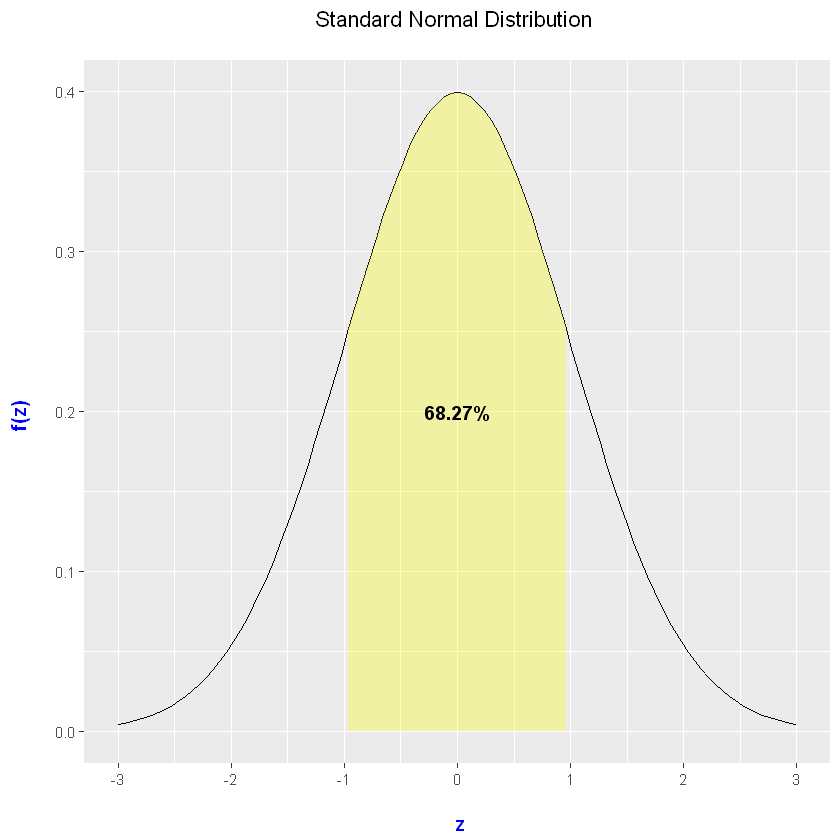

In [7]:
# Plot:

plot + stat_function(fun = dnorm) + 
 stat_function(fun = dnorm_one_sd, geom = "area", fill = "yellow", alpha = 0.3) +
 geom_text(x = 0, y = 0.2, size = 4, fontface = "bold", label = paste0(area_one_sd * 100, "%")) +
 scale_x_continuous(breaks = c(-3:3)) + 
 labs(x = "\n z", y = "f(z) \n", title = "Standard Normal Distribution \n") +
 theme(plot.title = element_text(hjust = 0.5), 
 axis.title.x = element_text(face="bold", colour="blue", size = 12),
 axis.title.y = element_text(face="bold", colour="blue", size = 12)) 

For the shaded area effect it is key to put in your custom function (dnorm_one_sd), `geom = "area"` and the fill colour in `stat_function()`.

Notice that two `stat_function()` functions were used. One is for creating the normal curve indicated by the black curve outline and the second `stat_function()` is for the yellow fill which is within one standard deviation from the mean of 0. The alpha argument determines the colour shading/contrast.

**Filling The Area Within Two Standard Deviations Of The Mean**

&nbsp;

The thought process and code is similar to the case above. Another custom function is made with another separate label for the code and plot.

&nbsp;

[1] 0.9545

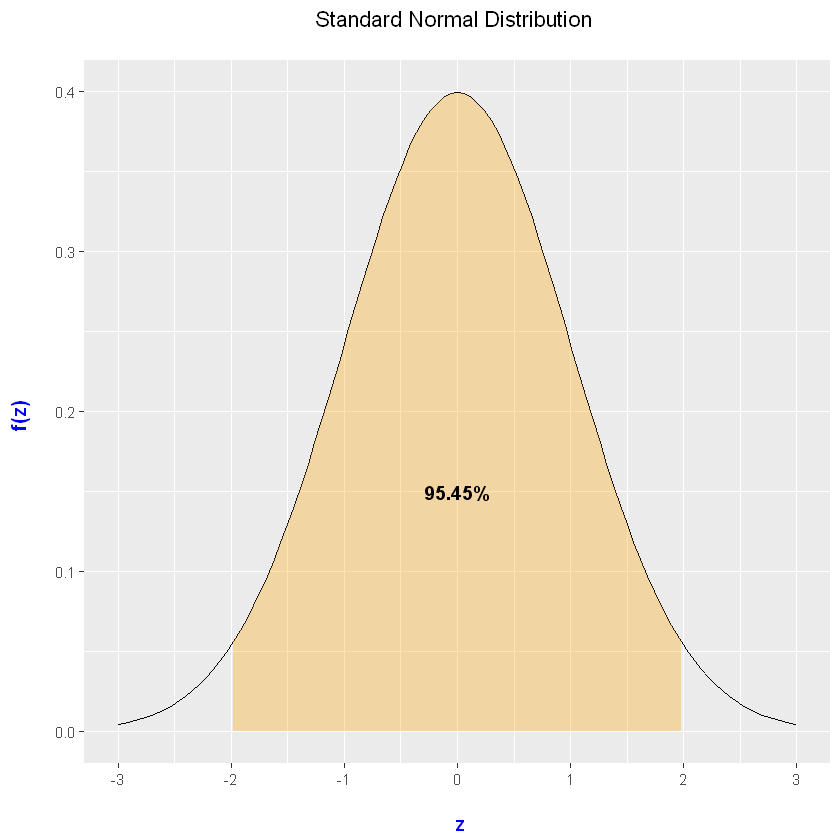

In [8]:
# Shading from x = -2 to x = 2 (within two std deviations):

dnorm_two_sd <- function(x){
  norm_two_sd <- dnorm(x)
  # Have NA values outside interval x in [-2, 2]:
  norm_two_sd[x <= -2 | x >= 2] <- NA
  return(norm_two_sd)
}

# Area underneath standard normal distribution within 2 standard deviations (z-score):

area_two_sd <- round(pnorm(2) - pnorm(-2), 4)
area_two_sd

plot + stat_function(fun = dnorm) + 
  stat_function(fun = dnorm_two_sd, geom = "area", fill = "orange", alpha = 0.3) +
  geom_text(x = 0, y = 0.15, size = 4, fontface = "bold",
            label = paste0(area_two_sd * 100, "%")) +
  scale_x_continuous(breaks = c(-3:3)) + 
  labs(x = "\n z", y = "f(z) \n", title = "Standard Normal Distribution \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="blue", size = 12),
        axis.title.y = element_text(face="bold", colour="blue", size = 12))

**Filling The Area Within Three Standard Deviations Of The Mean**

Here is the code and output for the case of the area under the normal curve withing three standard deviations of the mean.

[1] 0.9973

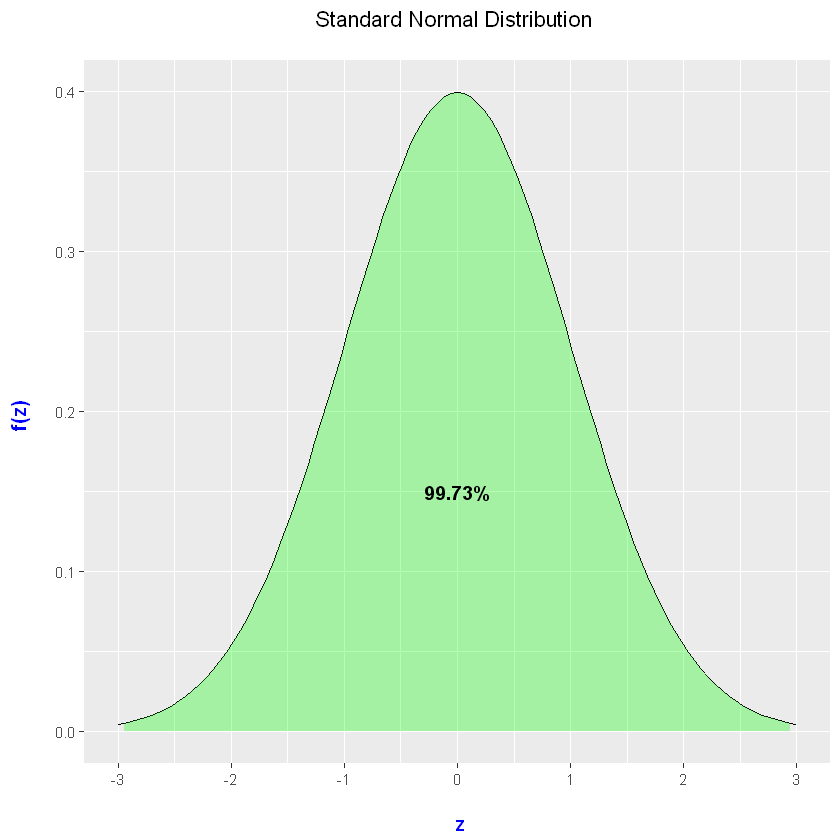

In [9]:
# Shading from x = -3 to x = 3 (within three std deviations):

dnorm_three_sd <- function(x){
  norm_three_sd <- dnorm(x)
  # Have NA values outside interval x in [-3, 3]:
  norm_three_sd[x <= -3 | x >= 3] <- NA
  return(norm_three_sd)
}

# Area underneath standard normal distribution within 3 standard deviations (z-score):
 
area_three_sd <- round(pnorm(3) - pnorm(-3), 4)
area_three_sd

plot + stat_function(fun = dnorm) + 
  stat_function(fun = dnorm_three_sd, geom = "area", fill = "green", alpha = 0.3) +
  geom_text(x = 0, y = 0.15, size = 4, fontface = "bold",
            label = paste0(area_three_sd * 100, "%")) +
  scale_x_continuous(breaks = c(-3:3)) + 
  labs(x = "\n z", y = "f(z) \n", title = "Standard Normal Distribution \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="blue", size = 12),
        axis.title.y = element_text(face="bold", colour="blue", size = 12)) 

**<u>Part Three - Creating Normal Distribution Summary Plots</u>**

&nbsp;

In this section, I will present code and output for creating informative normal distributions plots with useful labels such as the one below:

&nbsp;

<center><img src="http://www.muelaner.com/wp-content/uploads/2013/07/Standard_deviation_diagram.png" /></center>

&nbsp;

Source: http://www.muelaner.com/wp-content/uploads/2013/07/Standard_deviation_diagram.png

&nbsp;


**Version One**

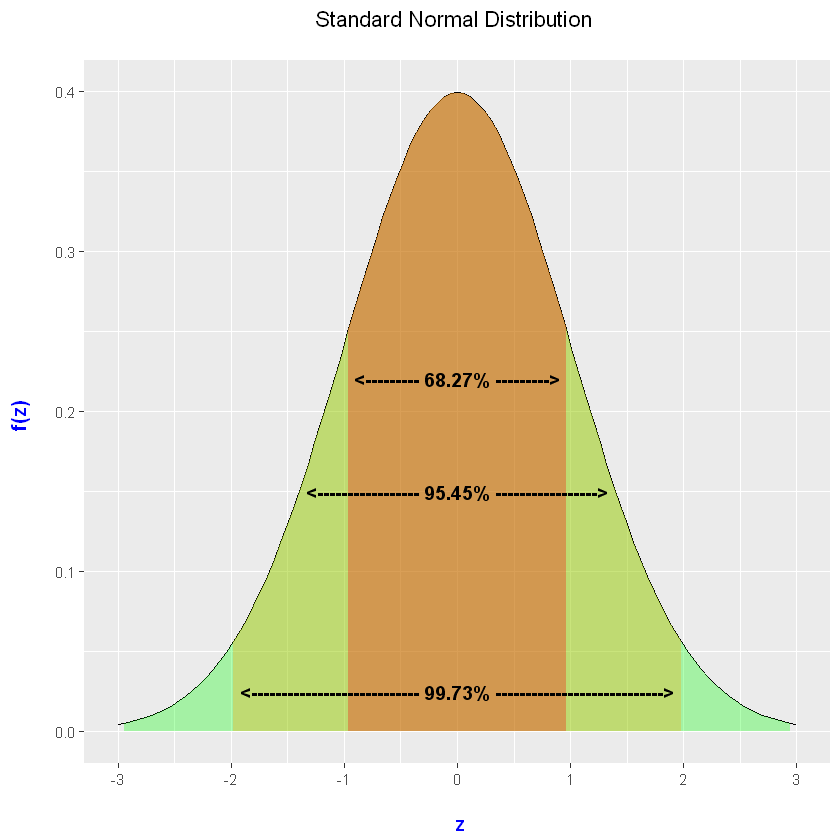

In [10]:
# Summary plot for normal distribution (Version One)

plot + stat_function(fun = dnorm) + 
 stat_function(fun = dnorm_three_sd, geom = "area", fill = "green", alpha = 0.3) +
 stat_function(fun = dnorm_two_sd, geom = "area", fill = "orange", alpha = 0.3) +
 stat_function(fun = dnorm_one_sd, geom = "area", fill = "red", alpha = 0.3) +
 geom_text(x = 0, y = 0.22, size = 4, fontface = "bold",
 label = paste0("<--------- ", area_one_sd * 100, "%", " --------->")) +
 geom_text(x = 0, y = 0.15, size = 4, fontface = "bold",
 label = paste0("<----------------- ", area_two_sd * 100, "%", " ----------------->")) +
 geom_text(x = 0, y = 0.025, size = 4, fontface = "bold",
 label = paste0("<---------------------------- ", area_three_sd * 100, 
 "%", " ---------------------------->")) +
 scale_x_continuous(breaks = c(-3:3)) + 
 labs(x = "\n z", y = "f(z) \n", title = "Standard Normal Distribution \n") +
 theme(plot.title = element_text(hjust = 0.5), 
 axis.title.x = element_text(face="bold", colour="blue", size = 12),
 axis.title.y = element_text(face="bold", colour="blue", size = 12)) 

The output comes out really nicely and can be used for informative purposes. The three percentage labels comes up from the three `geom_texts()`.

Do keep in mind that the code here does refer to custom functions and variables which were made from the previous section.

The `paste0()` function combines/concatenates strings and variables (outputs). I used `paste0()` to achieve the labels with arrows.

**Version Two**


This version is not much different that the first one above. It is just that the labels are different. I use the 68%, 95% and 99.7% labels which appeal to a lot of introductory statistics students.

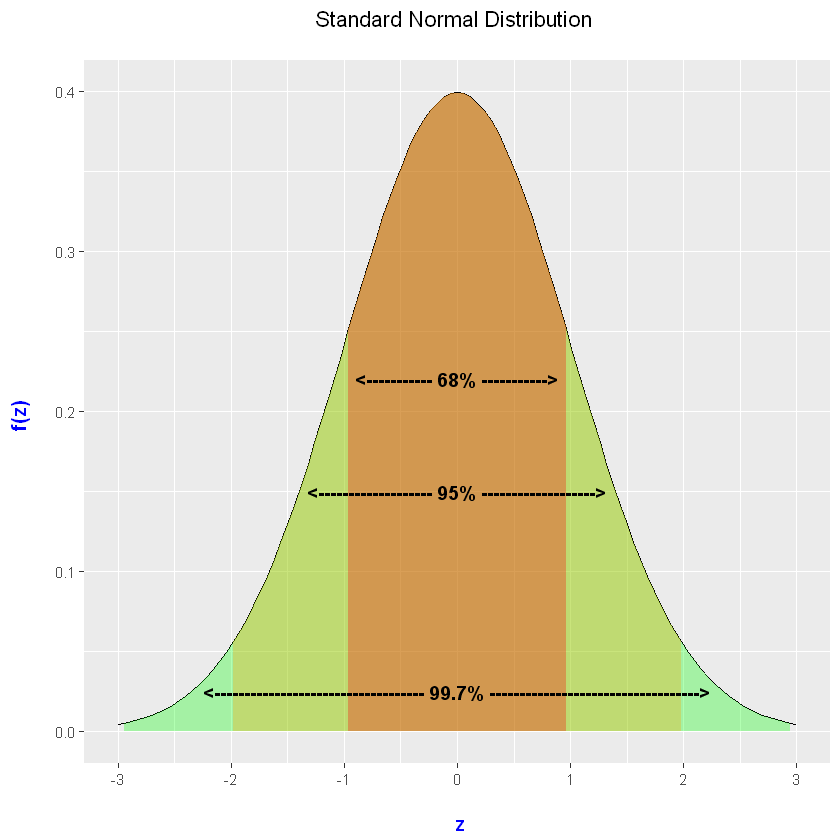

In [11]:
# Summary plot for normal distribution (Version Two)

plot + stat_function(fun = dnorm) + 
 stat_function(fun = dnorm_three_sd, geom = "area", fill = "green", alpha = 0.3) +
 stat_function(fun = dnorm_two_sd, geom = "area", fill = "orange", alpha = 0.3) +
 stat_function(fun = dnorm_one_sd, geom = "area", fill = "red", alpha = 0.3) +
 geom_text(x = 0, y = 0.22, size = 4, fontface = "bold",
 label = paste0("<----------- ", round(area_one_sd * 100, 0), "%", " ----------->")) +
 geom_text(x = 0, y = 0.15, size = 4, fontface = "bold",
 label = paste0("<------------------- ", round(area_two_sd * 100, 0), "%", 
 " ------------------->")) +
 geom_text(x = 0, y = 0.025, size = 4, fontface = "bold",
 label = paste0("<----------------------------------- ", round(area_three_sd * 100, 1), 
 "%", " ----------------------------------->")) +
 scale_x_continuous(breaks = c(-3:3)) + 
 labs(x = "\n z", y = "f(z) \n", title = "Standard Normal Distribution \n") +
 theme(plot.title = element_text(hjust = 0.5), 
 axis.title.x = element_text(face="bold", colour="blue", size = 12),
 axis.title.y = element_text(face="bold", colour="blue", size = 12)) 

**Version Three**

This version three normal distribution summary plot is different from the first two. The two plots above are within 1, 2 and 3 standard deviations from the mean.

This third plot provides a more comprehensive breakdown. As an example, a percentage label of 13.59% appears for the region from 1 standard deviation above (right of) the mean to 2 standard deviations above the mean. (The mean of a standard normal is 0.)


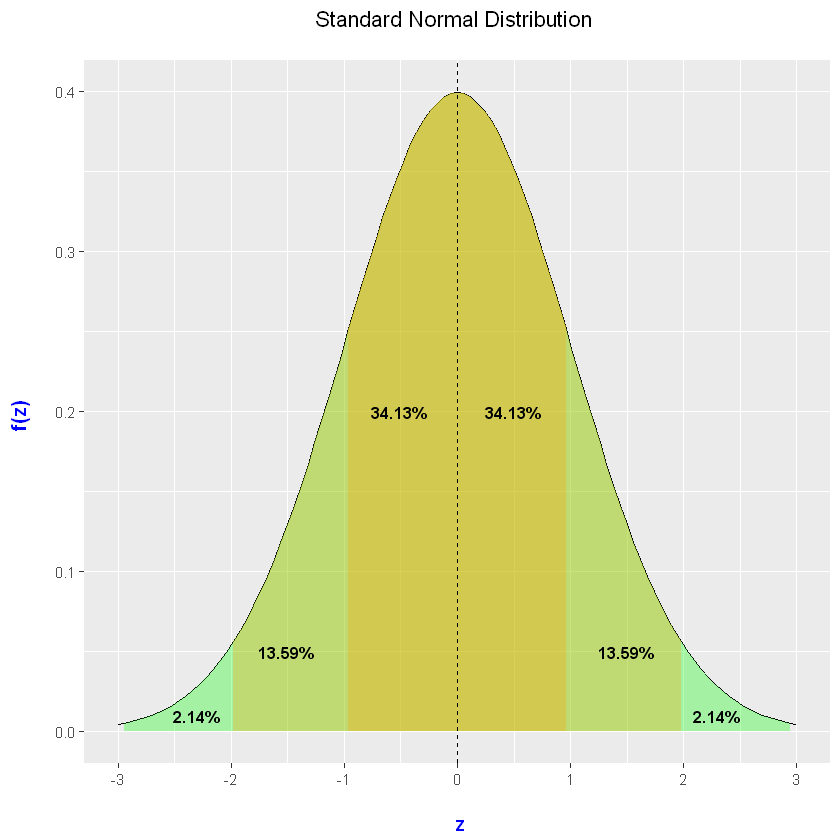

In [12]:
# Summary plot for normal distribution (Version Three)

plot + stat_function(fun = dnorm) + 
 stat_function(fun = dnorm_three_sd, geom = "area", fill = "green", alpha = 0.3) +
 stat_function(fun = dnorm_two_sd, geom = "area", fill = "orange", alpha = 0.3) +
 stat_function(fun = dnorm_one_sd, geom = "area", fill = "orange", alpha = 0.3) +
 geom_vline(xintercept = 0, colour = "black", linetype = "dashed") +
 geom_text(x = 0.5, y = 0.2, size = 3.5, fontface = "bold",
 label = paste0(round((area_one_sd * 100)/2,2), "%")) +
 geom_text(x = -0.5, y = 0.2, size = 3.5, fontface = "bold",
 label = paste0(round((area_one_sd * 100)/2,2), "%")) +
 geom_text(x = 1.5, y = 0.05, size = 3.5, fontface = "bold",
 label = paste0(round((pnorm(2) - pnorm(1)) * 100,2), "%")) +
 geom_text(x = -1.5, y = 0.05, size = 3.5, fontface = "bold",
 label = paste0(round((pnorm(-1) - pnorm(-2)) * 100,2), "%")) +
 geom_text(x = 2.3, y = 0.01, size = 3.5, fontface = "bold",
 label = paste0(round((pnorm(3) - pnorm(2)) * 100,2), "%")) +
 geom_text(x = -2.3, y = 0.01, size = 3.5, fontface = "bold",
 label = paste0(round((pnorm(-2) - pnorm(-3)) * 100,2), "%")) +
 scale_x_continuous(breaks = c(-3:3)) + 
 labs(x = "\n z", y = "f(z) \n", title = "Standard Normal Distribution \n") +
 theme(plot.title = element_text(hjust = 0.5), 
 axis.title.x = element_text(face="bold", colour="blue", size = 12),
 axis.title.y = element_text(face="bold", colour="blue", size = 12)) 

To show the symmetry of the standard normal distribution, I have inserted a vertical dashed line at the $mean = median = mode = 0$.

**<u>Notes**</u>

The ggplot2 data visualization package in R allows users to create some appealing and creative graphs, plots and visuals to display data. These colourful visuals can be very useful aids in communicating findings from data.

It does require a bit of knowledge in mathematics, probability, statistics and programming to understand the code and output.

**<u>References</u>**

* http://www.sthda.com/english/wiki/ggplot2-add-straight-lines-to-a-plot-horizontal-vertical-and-regression-lines

* R Graphics Cookbook by Winston Chang (2012)

* R Documentation (for the pnorm, dnorm functions).